In [1]:
using Pkg
Pkg.activate("../one_flav_env")

import DelimitedFiles: readdlm
using Interpolations
using Dierckx
using PythonPlot

rc("font", family="serif", serif="Computer Modern", size=14)
rc("figure", autolayout=true)
rc("axes", labelsize=16, unicode_minus=false)
rc("text", usetex=true)
rc("text.latex", preamble=raw"\usepackage{slashed}")

golden_ratio = (1+sqrt(5))/2
;

  Activating project at `~/Dropbox (University of Oregon)/MuC/Aria/one_flav/code/one_flav_env`


In [2]:
xsec_UL = readdlm("pp_to_slsl_xsec_UL.txt", ' '; skipstart=1)
xsec_sim = readdlm("pp_to_slsl_xsec.txt", '\t')
;

In [3]:
itp_sim = linear_interpolation(xsec_sim[:,1], xsec_sim[:,2], extrapolation_bc=Line());

In [54]:
xsec_UL_2 = Matrix{Float64}(undef, (length(xsec_UL[:,1])+1, length(xsec_UL[1,:])))
@. xsec_UL_2[1:end-1, :] = xsec_UL
xsec_UL_2[end,3] = xsec_UL[end,3]
xsec_UL_2[end,2] = 10.0
xsec_UL_2[end,1] = 900.0
xsec_UL_2
data = reshape(xsec_UL_2[:,3], (4,10))
msls = reshape(xsec_UL_2[:,1], (4,10))[1,:]
taus = reshape(xsec_UL_2[:,2], (4,10))[:,1]
# itp_UL = interpolate((log10.(taus), msls), data, Gridded(Linear()))
# etp_UL = extrapolate(itp_UL, Line())
etp_UL = Spline2D(log10.(taus), msls, data; kx=2, ky=2, s=1)
;

In [82]:
etp_UL_1 = Spline1D(taus, data[:,2]; k=1, bc="extrapolate", s=.1)

Spline1D(knots=[0.01, 10.0], k=1, extrapolation="extrapolate", residual=0.0008740535280027711)

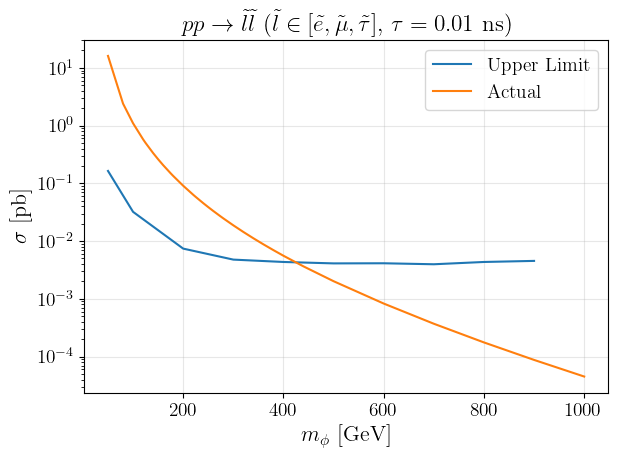

In [6]:
f = figure()
idx = 1
plot(msls, data[idx,:], label="Upper Limit")
plot(xsec_sim[:,1], 3 .* xsec_sim[:,2], label="Actual")
yscale("log")
xlabel(L"$m_\phi$ [GeV]")
ylabel(L"$\sigma$ [pb]")
title(L"$p p \to \tilde{l} \tilde{l}$ ($\tilde{l} \in [\tilde{e}, \tilde{\mu}, \tilde{\tau}]$, $\tau = %$([0.01,0.1,1,10][idx])$ ns)")
legend()
grid(alpha=0.3)
plotclose()
f

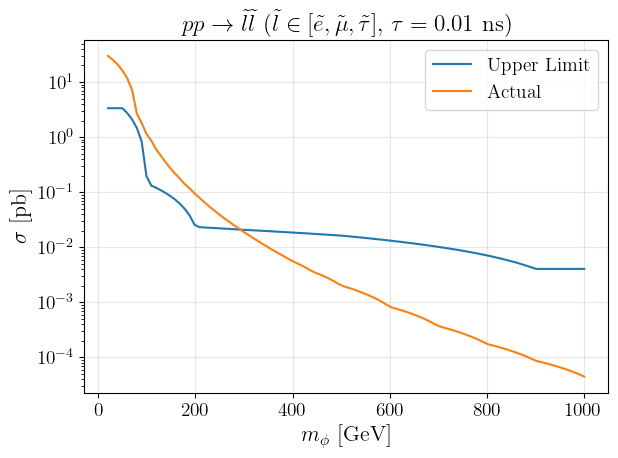

In [36]:
f3 = figure()
m_s = range(20, 1000, 100)
# idx = 1
plot(m_s, etp_UL.(log10(30), m_s), label="Upper Limit")
plot(m_s, 3 .* itp_sim.(m_s), label="Actual")
yscale("log")
xlabel(L"$m_\phi$ [GeV]")
ylabel(L"$\sigma$ [pb]")
title(L"$p p \to \tilde{l} \tilde{l}$ ($\tilde{l} \in [\tilde{e}, \tilde{\mu}, \tilde{\tau}]$, $\tau = %$([0.01,0.1,1,10][idx])$ ns)")
legend()
grid(alpha=0.3)
plotclose()
f3

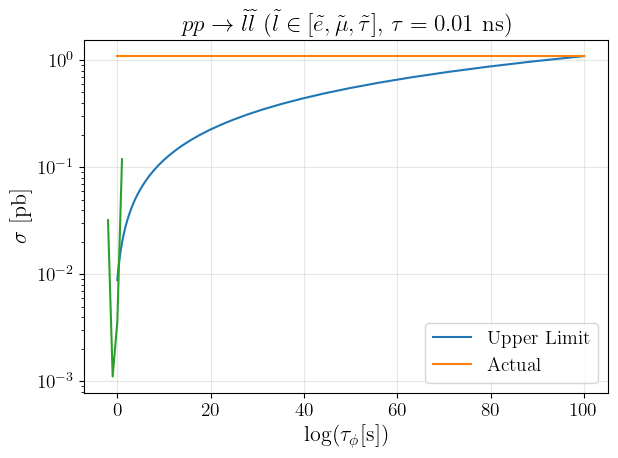

In [83]:
f4 = figure()
taus_test = 10 .^ range(-3, 2, 100)
plot(taus_test, etp_UL_1.(taus_test), label="Upper Limit")
plot(taus_test, 3 .* (zero(taus_test).+1) .* itp_sim.(100), label="Actual")
plot(log10.(taus), data[:,2])
yscale("log")
xlabel(L"$\log(\tau_\phi$[s]$)$")
ylabel(L"$\sigma$ [pb]")
title(L"$p p \to \tilde{l} \tilde{l}$ ($\tilde{l} \in [\tilde{e}, \tilde{\mu}, \tilde{\tau}]$, $\tau = %$([0.01,0.1,1,10][idx])$ ns)")
legend()
grid(alpha=0.3)
plotclose()
f4

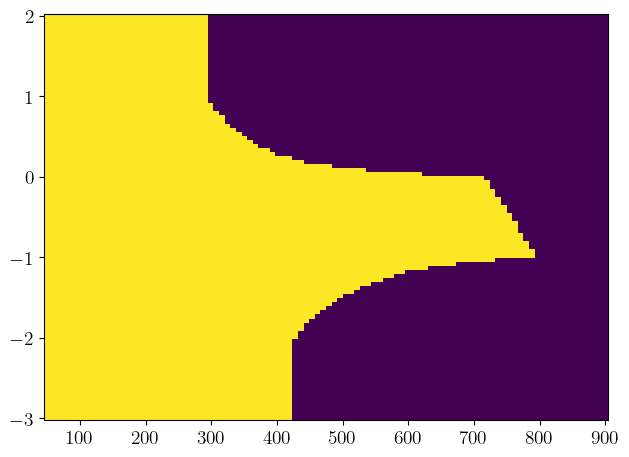

In [24]:
f2 = figure()
tau_test = range(-3, 2, 100)
msl_test = range(50, 900, 100)
ruled_out = zeros(Bool, (length(tau_test), length(msl_test)))
for (i,t) in enumerate(tau_test)
    for (j,m) in enumerate(msl_test)
        ruled_out[i,j] = etp_UL(t,m) < 3 * itp_sim(m)
    end
end
pcolormesh(msl_test, tau_test, ruled_out)
# yscale("log")
plotclose()
# f2.savefig("../figs/slepton_ruled_out.pdf")
f2